# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
DATA_PATH = PROJECT_ROOT / "data"

#### Load the Data into pd.DataFrame

In [2]:
df = pd.read_csv(DATA_PATH / "ratings.dat")
print(f"Shape of the DataFrame (ratings.dat): {df.shape}")
print(f"Column Names of the DataFrame: {list(df.columns)}")
print(f"Data Type of Columns: {df.dtypes.to_dict()}")

Shape of the DataFrame (ratings.dat): (3220037, 3)
Column Names of the DataFrame: ['userID', 'profileID', 'rating']
Data Type of Columns: {'userID': dtype('int64'), 'profileID': dtype('int64'), 'rating': dtype('int64')}


#### Standard Descriptive Analysis
In this step, we will analyze the dataset to check for any missing values in the dataframe `df` using the `isnull().sum()` method.

In [3]:
print(f"DF Info: \n {df.info()}")
print(" # " * 20)
print(f"Data Description: \n {df.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220037 entries, 0 to 3220036
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   userID     int64
 1   profileID  int64
 2   rating     int64
dtypes: int64(3)
memory usage: 73.7 MB
DF Info: 
 None
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  # 
Data Description: 
              userID     profileID        rating
count  3.220037e+06  3.220037e+06  3.220037e+06
mean   1.217598e+05  1.012708e+05  5.953207e+00
std    9.156299e+03  6.216991e+04  3.106428e+00
min    1.005960e+05  1.000000e+00  1.000000e+00
25%    1.164820e+05  4.801400e+04  3.000000e+00
50%    1.227230e+05  9.713400e+04  6.000000e+00
75%    1.291250e+05  1.511780e+05  9.000000e+00
max    1.353590e+05  2.209700e+05  1.000000e+01


In [4]:
df.isnull().sum()

userID       0
profileID    0
rating       0
dtype: int64

Since the Data has no missing values, we do not need any imputation straegy.

In [5]:
gender_df = pd.read_csv(DATA_PATH / "gender.dat")
len(gender_df)

220969

In [6]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates
df = df.drop_duplicates()
print(f"DataFrame shape after dropping duplicates: {df.shape}")

Number of duplicate rows: 47
DataFrame shape after dropping duplicates: (3219990, 3)


In [7]:
df["userID"].duplicated().sum()

np.int64(3194745)

In [8]:
df["profileID"].duplicated().sum()

np.int64(3094562)

In [9]:
n_users = df["userID"].nunique()
n_profiles = df["profileID"].nunique()
print(f"{n_users} unique users; {n_profiles} unique profiles")

25245 unique users; 125428 unique profiles


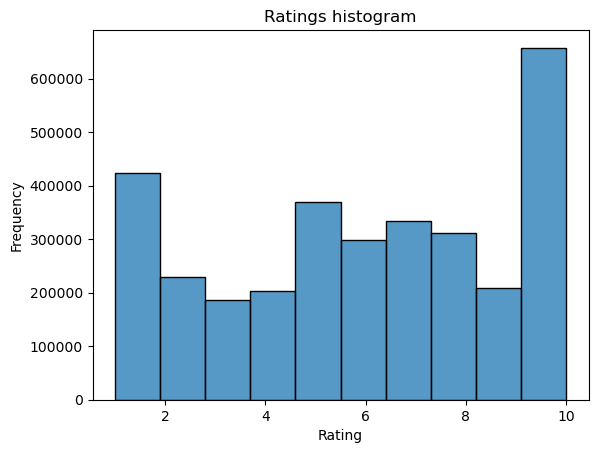

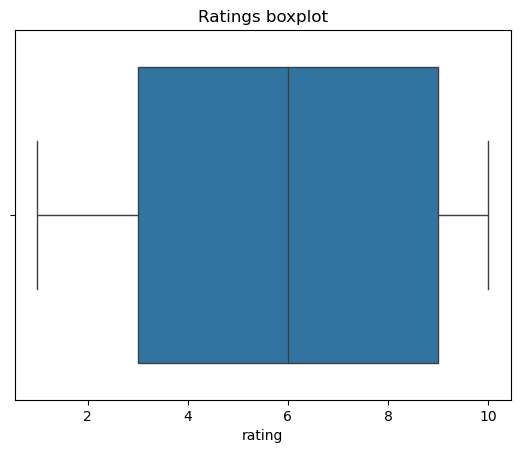

In [10]:
# Histogram
sns.histplot(
    df["rating"],
    bins=10,
)
plt.title("Ratings histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(df["rating"], orient="h")
plt.title("Ratings boxplot")
plt.show()

In [11]:
# Count how many times each profile was rated
profile_stats = (
    df.groupby("profileID")["rating"]
    .agg(["count", "mean"])
    .rename(columns={"count": "rating_count", "mean": "avg_rating"})
)

# Descriptive stats on rating_count
print(profile_stats["rating_count"].describe())

count    125428.000000
mean         25.672019
std          88.312579
min           1.000000
25%           2.000000
50%           7.000000
75%          21.000000
max        6191.000000
Name: rating_count, dtype: float64


count    25245.000000
mean       127.549614
std        362.099440
min          2.000000
25%         29.000000
50%         73.000000
75%        123.000000
max      18342.000000
Name: ratings_given, dtype: float64


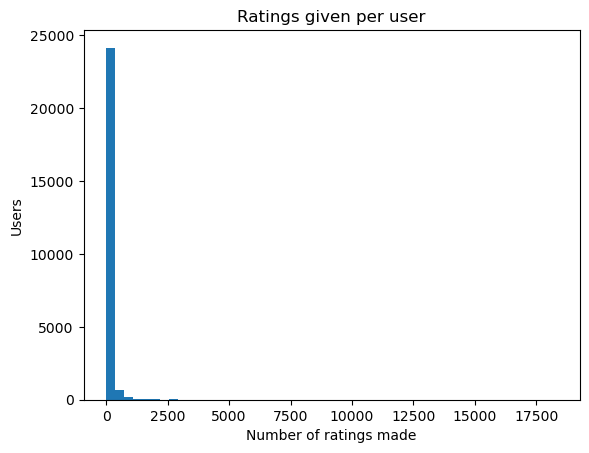

In [12]:
user_stats = df.groupby("userID")["rating"].count().rename("ratings_given")
print(user_stats.describe())

plt.hist(user_stats, bins=50)
plt.title("Ratings given per user")
plt.xlabel("Number of ratings made")
plt.ylabel("Users")
plt.show()

#### Outlier detection

In [13]:
Q1, Q3 = df["rating"].quantile([0.25, 0.75])
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
outliers = df[(df["rating"] < low) | (df["rating"] > high)]
print("Rating outliers:", len(outliers))

Rating outliers: 0


#### Correlation

In [14]:
corr = profile_stats["rating_count"].corr(profile_stats["avg_rating"])
print("Corr(rating_count, avg_rating) =", corr)

Corr(rating_count, avg_rating) = 0.020104177378180838


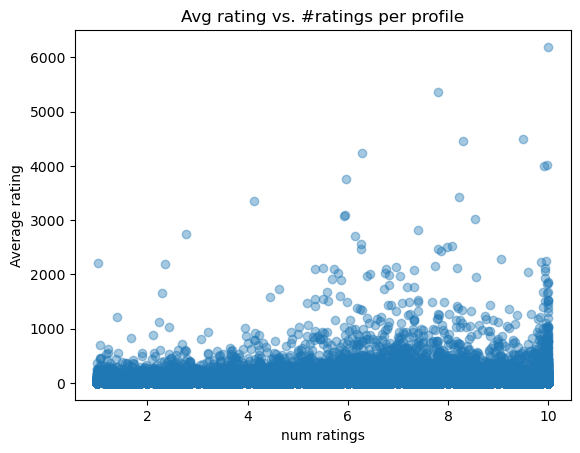

In [15]:
plt.scatter(profile_stats["avg_rating"], profile_stats["rating_count"], alpha=0.4)
plt.title("Avg rating vs. #ratings per profile")
plt.xlabel("num ratings")
plt.ylabel("Average rating")
plt.show()